In [2]:
import scipy.io as sio
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
ds = sio.loadmat('face.mat')

In [3]:
X = ds['X']
l = ds['l'][0]
X = pd.DataFrame(X.transpose())
N = X.shape[0]*0.75
l = pd.DataFrame(l)

In [4]:
X_train, X_test, l_train, l_test = train_test_split(X, l, test_size=0.25, random_state=42)
# X_bar = np.mean(X, axis=1)
X_train, X_test = X_train.values, X_test.values

In [5]:
X_bar = np.mean(X_train, axis=0)
# print(X_bar)
i = 0
for x in X_train:
    norm = [x - X_bar]
    norm = np.asarray(norm, dtype='float32')
    norm_T = np.transpose(norm)
    if i == 0:
        offset = np.dot(norm_T, norm)
        i += 1
        # print(norm.transpose())
    else:
        offset += np.dot(norm_T, norm)
    #     offset += np.matmul (norm.transpose(), norm)
offset = offset/N
w, v = np.linalg.eig(offset)

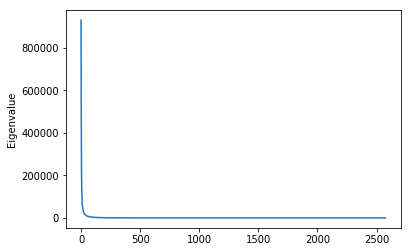

In [6]:
sorted(w,reverse=True)
plt.plot(w)
plt.ylabel('Eigenvalue')
plt.show()

c:\users\georg\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log10
  after removing the cwd from sys.path.


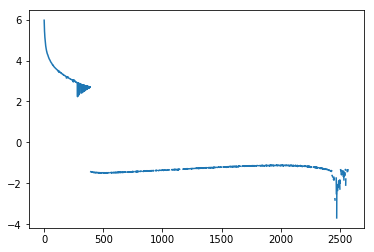

In [7]:
aic = np.zeros_like(w)
N_eig = w.shape[0]
for i in range(N_eig):
    aic[i] = np.log10(w[i])+2*i/N_eig
plt.plot(aic)

In [8]:
test = min(aic[0:130])
print(test)
ind = np.argmin(aic[0:130])
print(ind)

3.4262455
126
